# Yerevan House Price Prediction

## Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
data = pd.read_csv("../../intro/Data/yerevan_houses.csv")
data.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8


### Split into train test

In [43]:
# code here
X = data["area"].values.reshape(data["area"].shape[0], 1)
Y = data["price"].values.reshape(data["price"].shape[0], 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 64)
#Y_train = X_train[ : , 1].reshape(len(X_train), 1)
#Y_test = X_test[ : , 1].reshape(len(X_test), 1)
#X_train = X_train[ : , 0].reshape(len(X_train), 1)
#X_test = X_test[ : , 0].reshape(len(X_test), 1)


### Fit linear regression with area 

In [44]:
# code here
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plot fited line and points, calculate loss and R^2

Loss: 41019.661437479444
R^2: 0.393599800485241


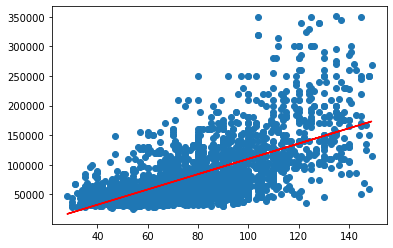

In [45]:
# code here
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, "r");
loss = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Loss:", loss)
print("R^2:", definition(Y_test, Y_pred))

### And new features, use pd.get_dumies for vectorization categorical variables

In [46]:
# code here
#data = data.drop(["Unnamed: 0"], axis = 1)
data = pd.get_dummies(data, drop_first = True)
data.head()
X = np.append(X, data[data.columns[9:21]], axis = 1)

### Fit with new features, calculate loss and R^2

In [47]:
# code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 64)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
loss = np.sqrt(mean_squared_error(Y_test, Y_pred))

print("Loss:", loss)
print("R^2:", definition(Y_test, Y_pred))

Loss: 32722.71510274965
R^2: 0.6141008207383907


### Standartize features and fit again

In [48]:
# code here

### Try same with polynomial regression, monitor loss and choose best degree for polynomial regression

In [49]:
# code here
model_poly = PolynomialFeatures(degree = 2)
x_poly = model_poly.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)

x_poly = model_poly.fit_transform(X_test)
Y_pred = model.predict(x_poly)

loss = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print("Loss:", loss)
print("R^2:", r2)

Loss: 30588.05506293622
R^2: 0.6628067136373977
